## Import Libraries

In [18]:
import train_test
import ABC_train_test
import linearDataset
import network
import statsModel
import performanceMetrics
import dataset
import sanityChecks
import torch 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from torch.utils.data import Dataset,DataLoader 
from torch import nn
import warnings
import numpy as np
warnings.filterwarnings('ignore')

## Dataset

Generate the linear dataset 

$y=m*x + c + e$ where $m=1$, $c=0.5$ and $e \sim N(0,1)$

In [19]:
n_samples = 100
n_features = 1

          X         Y
0  0.284428  0.266930
1 -0.338023  1.243561
2  0.354046  1.635855
3  0.337312  0.850613
4 -0.188254  0.253141


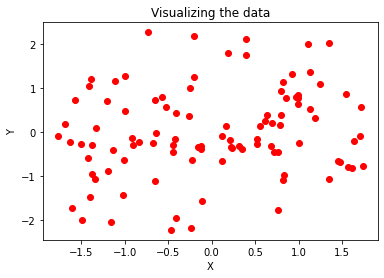

In [20]:
X,Y = linearDataset.linear_data(n_samples)

## Stats Model

The statistical model is assumed to be $Y=\beta X + \mu$ where $\mu \sim N(0,1)$

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):              0.025
Method:                 Least Squares   F-statistic:                              3.557
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                      0.0622
Time:                        18:56:21   Log-Likelihood:                         -140.13
No. Observations:                 100   AIC:                                      282.3
Df Residuals:                      99   BIC:                                      284.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

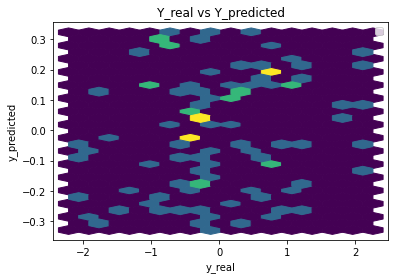

Performance Metrics
Mean Squared Error: 0.9653138580075266
Mean Absolute Error: 0.7741908319606337
Manhattan distance: 77.41908319606337
Euclidean distance: 9.825038717519268


In [21]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

## Generator and Discriminator Networks 


In [22]:
#Discriminator Parameters 
hidden_nodes = 25 
#ABC Generator Parameters
mean = 1 
variance = 0.001

**Generator Model**

In [23]:
class Generator(nn.Module):

  def __init__(self,n_input):
    super().__init__()
    self.output = nn.Linear(n_input,1)

  def forward(self, x):
    x = self.output(x)
    return x 
    

**Discriminator Model**

In [24]:
class Discriminator(nn.Module):
  def __init__(self,n_input,n_hidden):

    super().__init__()
    self.hidden = nn.Linear(n_input,n_hidden)
    self.output = nn.Linear(n_hidden,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.hidden(x)
    x = self.relu(x)
    x = self.output(x)
    return x 

**ABC Generators** 


1. *Correctly Specified Prior* : The 1st ABC Generator is defined as $Y = m*X + c + e$ where $m \sim N(1,1)$ , $c=0.5$ and $e \sim N(0,1)$
2. *Misspecified Prior* : The 2nd ABC Generator is defined as $Y = 1 + m*X + c + e$ where $m \sim N(1,1)$ , $c=0.5$ and $e \sim N(0,1)$

## GAN Model

In [25]:
real_dataset = dataset.CustomDataset(X,Y)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [26]:
generator = Generator(n_features+1)
discriminator = Discriminator(n_features+1,hidden_nodes)

criterion = torch.nn.BCEWithLogitsLoss()
gen_opt = torch.optim.Adam(generator.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator.parameters(), lr=0.01, betas=(0.5, 0.999))

In [27]:
n_epochs = 30000
batch_size = n_samples//2

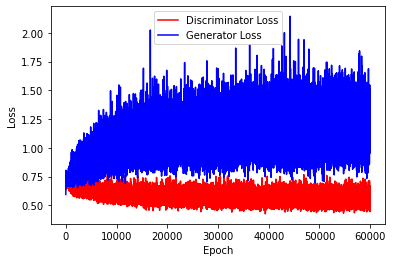

In [28]:
train_test.training_GAN(discriminator,generator,disc_opt,gen_opt,real_dataset,batch_size, n_epochs,criterion,device)

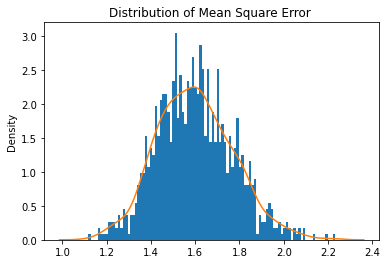

Mean Square Error: 1.5992401574691313


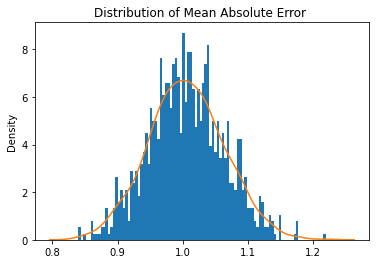

Mean Absolute Error: 1.0056705273280293


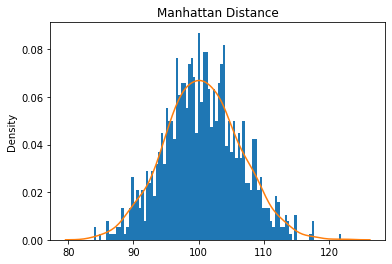

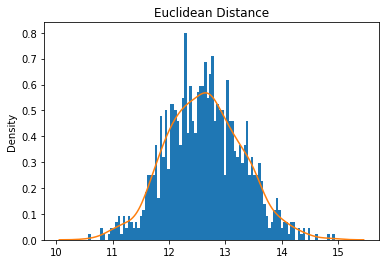

In [29]:
train_test.test_generator(generator,real_dataset,device)